# Поиск частых наборов
## Елисеев ЕВ КЭ-403

### Задание


Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций). <br>
Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. <br>
Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).<br>
Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%). <br>
Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
- сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
- количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.<br>

Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами: <br> 
- формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

### Программа поиска частых наборов

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np


# получение исходных данных
df = pd.read_csv("baskets.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# функция поиска частых наборов
def find_frequent_itemsets(df: pd.DataFrame, 
                           min_supp: float=0.1, 
                           sort_by: str='supp', 
                           min_items: int=1) -> pd.DataFrame:
    
    def desk_supp_sort(items):
        return items.sort_values(by='support', ascending=False)
    
    def lexicographic_sort(items):
        return items.sort_values(by='itemsets')
    
    SORT_METHOD = {'supp': desk_supp_sort,
                   'lex': lexicographic_sort}

    # Преобразование данных в список списков для подачи в метод fit
    transactions = df.values.tolist()

    # Удаление значений NaN из транзакций
    transactions = [[item for item in transaction if not pd.isnull(item)] for transaction in transactions]

    # Преобразование в разряженную матрицу
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    transactions_matrix = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Поиск частых наборов
    frequent_itemsets = apriori(transactions_matrix, min_support=min_supp, use_colnames=True)
    
    # Сортировка элементов в каждом наборе
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: sorted(list(x)))
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: x if len(x) >= min_items else None)
    frequent_itemsets.dropna(inplace=True)
    
    return SORT_METHOD[sort_by](frequent_itemsets)

### Эксперименты

In [3]:
# Первые 10 наборов отсортированных по поддержке с минимальной поддержкой 0.01
freq_items = find_frequent_itemsets(df, min_supp=0.01, sort_by='supp')
freq_items.head(20)

,support,itemsets
31,0.238368,[минеральная вода]
26,0.187975,[макароны]
73,0.179709,[яйца]
20,0.170911,[картофель-фри]
69,0.163845,[шоколад]
17,0.132116,[зеленый чай]
32,0.129583,[молоко]
9,0.098254,[говяжий фарш]
15,0.095321,[замороженные овощи]
5,0.095054,[блинчики]


Результаты можно интерпретировать в целом, как топ 20 самых популярных продуктов <br>
Чаще всего люди докупают недостающие продукты домой, либо воду и продукты быстрого питания, чтобы<br>
утолить голод и жажду

In [4]:
# Самый длинный набор при поддержке 0.01
index = freq_items['itemsets'].apply(len).idxmax()
freq_items.loc[index, 'itemsets']

['говяжий фарш', 'макароны', 'минеральная вода']

In [5]:
# Первые 10 наборов отсортированных по поддержке с минимальной поддержкой 0.01 и минимальным числом элементов 2
freq_items = find_frequent_itemsets(df, min_supp=0.01, sort_by='supp', min_items=2)
freq_items.head(10)

,support,itemsets
183,0.061192,"[макароны, минеральная вода]"
211,0.052660,"[минеральная вода, шоколад]"
213,0.050927,"[минеральная вода, яйца]"
199,0.047994,"[минеральная вода, молоко]"
105,0.040928,"[говяжий фарш, минеральная вода]"
195,0.040795,"[макароны, шоколад]"
104,0.040261,"[говяжий фарш, макароны]"
197,0.038662,"[макароны, яйца]"
184,0.036928,"[макароны, молоко]"
165,0.036395,"[картофель-фри, яйца]"


Из наборов [макароны, минеральная вода], [минеральная вода, яйца], [минеральная вода, молоко], <br>
можно предположить, что люди могут заходить в магазин за минеральной водой из-за жажды, а <br>
сопутсвующие товары (макароны, яйца, молоко) докупать домой, как недостоющие.<br>
То же самое можно сказать про [макароны, шоколад]
Такие товары, как [говяжий фарш, макароны] или [макароны, яйца] могут быть ингредентами <br>
для какого-нибудь блюда, поэтому их могут часто покупать вместе

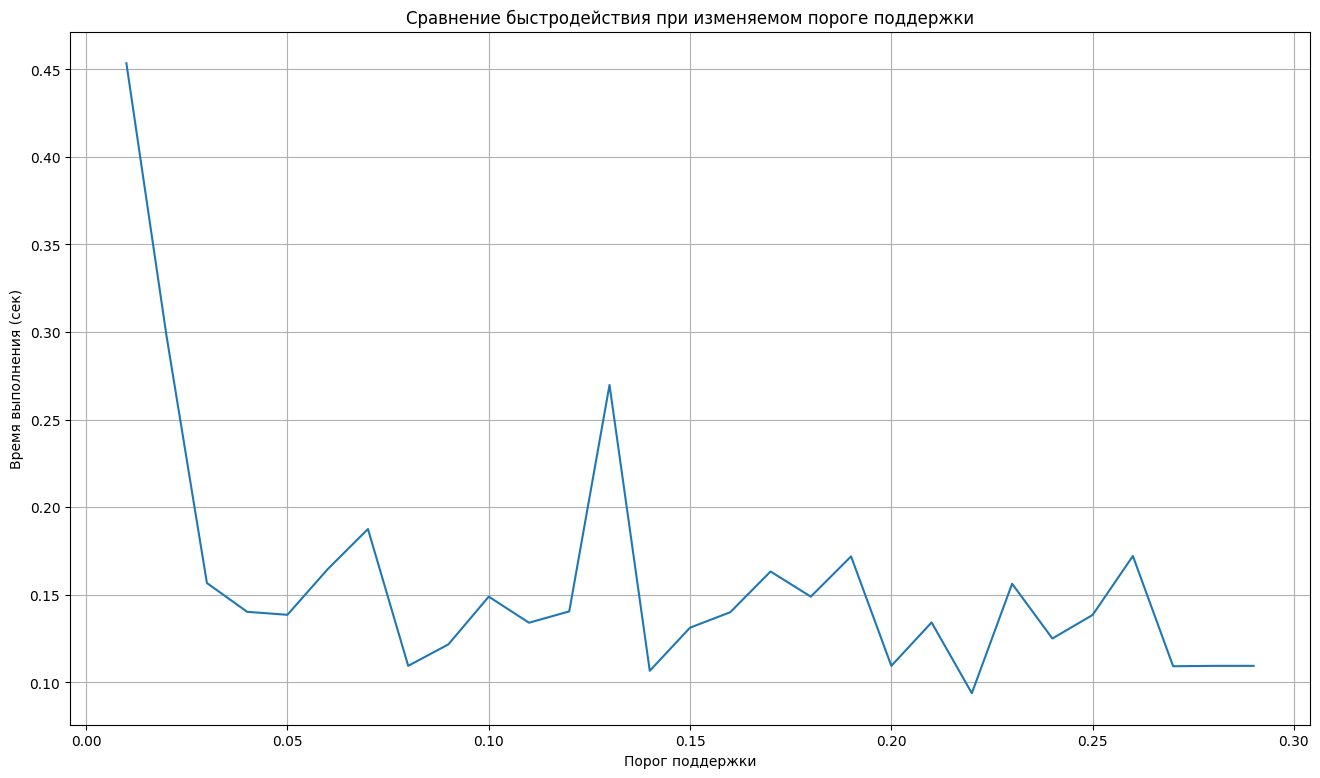

In [6]:
import time
import matplotlib.pyplot as plt


def visualize_perfomance_by_min_sup(items, min_supp):
    times = []
    supp = []
    while min_supp < 0.3:
        start_time = time.time()
        find_frequent_itemsets(items, min_supp=min_supp, sort_by='supp')
        execution_time = time.time() - start_time
        times.append(execution_time)
        supp.append(min_supp)
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    plt.figure(figsize=(16, 9))
    plt.plot(supp, times)
    plt.title('Сравнение быстродействия при изменяемом пороге поддержки')
    plt.xlabel('Порог поддержки')
    plt.ylabel('Время выполнения (сек)')
    plt.grid(True)
    plt.show()
    
    
visualize_perfomance_by_min_sup(df, 0.01)

Из графика видно, что поиск наборов занимает длительное время при небольших значениях <br>
поддержки, однако при увеличении порога скорость вычисления начинает возврастать.<br>
Это обусловлено самим алгоритмом apriori, который при высоком пороге поддержки <br>
отбрасывает заведомо неподходящие наборы

C:\Users\santiperro\AppData\Local\Temp\ipykernel_12308\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\santiperro\AppData\Local\Temp\ipykernel_12308\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\santiperro\AppData\Local\Temp\ipykernel_12308\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

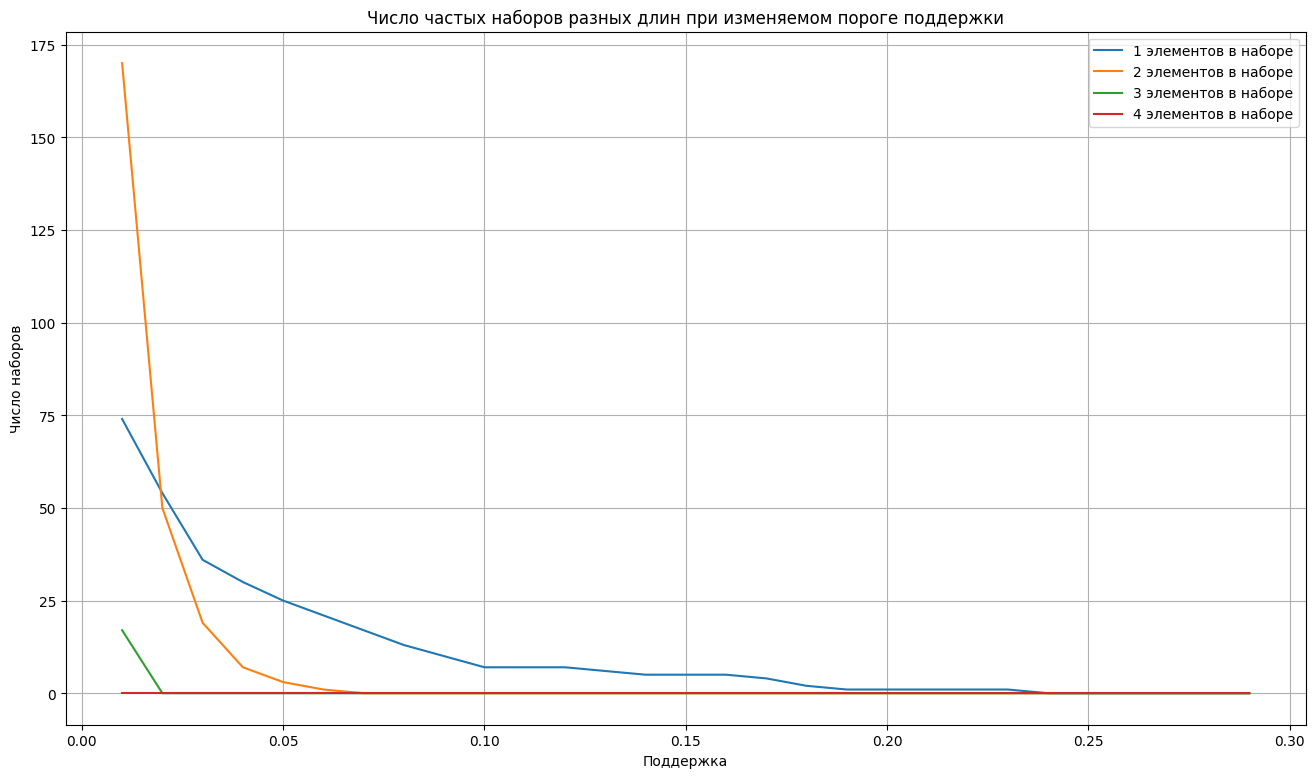

In [7]:
def visualize_number_of_items_by_min_sup(items, min_supp):
    # Создаем словарь для хранения результатов с максимальной длиной набора 5
    number_of_items_by_length = {i: [] for i in range(1, 5)}
    supports = []
    
    while min_supp < 0.3:
        frequent_itemsets = find_frequent_itemsets(df, min_supp=min_supp, sort_by='supp', min_items=1)
        
        # Подсчет количества наборов разной длины
        counts = frequent_itemsets['itemsets'].apply(len).value_counts().sort_index()
    
        # Сохраняем результаты
        for length in number_of_items_by_length.keys():
            number_of_items_by_length[length].append(counts.get(length, 0))
        supports.append(min_supp)   
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    # Создаем диаграмму
    plt.figure(figsize=(16, 9))

    # Для каждой длины набора
    for length, counts in number_of_items_by_length.items():
        plt.plot(supports, counts, label=f'{length} элементов в наборе')

    plt.xlabel('Поддержка')
    plt.ylabel('Число наборов')
    plt.title('Число частых наборов разных длин при изменяемом пороге поддержки')
    plt.legend()
    plt.grid(True)
    plt.show()
    

visualize_number_of_items_by_min_sup(df, 0.01)

Из привиденного выше графика можно заметить, что при увеличении порога поддержки число наборов <br>
среди наборов из некскольких эементов резко снижается. Число наборов из одного элемент снижается гораздо<br>
плавнее. Из этого можно сделать вывод, что гораздо чаще люди предпочитают покупать один продукт, чем несколько


# Поиск ассоциативных правил
## Елисеев ЕВ КЭ-403

### Задание
Доработайте программу из задания Поиск частых наборов, чтобы она также выполняла поиск ассоциативных правил. <br>
Список результирующих правил должен выдаваться в удобочитаемом виде (антецедент→консеквент) с указанием поддержки<br> 
и достоверности каждого правила. Дополнительные параметры программы: порог достоверности, способ упорядочивания <br>
результирующего списка наборов (по убыванию значения поддержки или лексикографическое).<br>
Проведите эксперименты на наборах из задания 1. В экспериментах Зафиксируйте значение пороговое значение поддержки<br>
 (например, 10%), варьируйте пороговое значение достоверности (например, от 70% до 95% с шагом 5%).<br>
Выполните визуализацию полученных результатов в виде следующих диаграмм:<br>
- сравнение быстродействия поиска правил на фиксированном наборе данных при изменяемом пороге достоверности;
- общее количество найденных правил на фиксированном наборе данных при изменяемом пороге достоверности.

Подготовьте список правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов <br>
(разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.<br>
Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой <br>
связный и структурированный документ со следующими разделами:  <br>
- формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

### Программа

In [8]:
from mlxtend.frequent_patterns import association_rules


def find_association_rules(data: pd.DataFrame, 
                          min_supp: float= 0.01, 
                          min_conf: float=0.01,
                          sort_by: str='supp',
                          max_left_elements: int=7,
                          max_right_elements: int=7) -> pd.DataFrame:

    def cell_to_string(cell):
        if not isinstance(cell, str):
            try:
                iter(cell)
                string = ""
                for item in cell:
                    string += f"({item}), "
                string = string[:-2]
                return string
            except TypeError:
                pass
        return cell
    
    freq_items = find_frequent_itemsets(data, min_supp=min_supp, sort_by=sort_by)
    rules = association_rules(freq_items, metric='confidence', min_threshold=min_conf)
    
    # Убираем ненужные столбцы
    rules.drop('antecedent support', axis=1, inplace=True)
    rules.drop('consequent support', axis=1, inplace=True)
    rules.drop('leverage', axis=1, inplace=True)
    rules.drop('conviction', axis=1, inplace=True)
    if "zhangs_metric" in rules.columns:
        rules.drop('zhangs_metric', axis=1, inplace=True)
        
    # Округляем значения столбцов
    rules["support"] = rules["support"].round(3)
    rules["confidence"] = rules["confidence"].round(3)
    rules["lift"] = rules["lift"].round(3)
        
    
    rules["antecedents"] = rules["antecedents"].apply(lambda x: x if len(x) <= max_left_elements else None)
    rules["consequents"] = rules["consequents"].apply(lambda x: x if len(x) <= max_right_elements else None)
    rules["antecedents"] = rules["antecedents"].apply(lambda x: cell_to_string(x))
    rules["consequents"] = rules["consequents"].apply(lambda x: cell_to_string(x))
    return rules.dropna()

### Эксперименты

In [9]:
# Отсортируем по достоверности ассоциативные правила с поддержкой 0.001 и достоверностью в промежутке 0.7 - 0.8
rules = find_association_rules(df, min_supp=0.002, min_conf=0.7).sort_values(by='confidence', ascending=False)
rules.loc[rules['confidence'] <= 0.8].head(10)

,antecedents,consequents,support,confidence,lift
9,"(молоко), (рис), (помидоры)",(макароны),0.002,0.800,4.256
6,"(замороженные овощи), (говяжий фарш), (креветки)",(макароны),0.003,0.792,4.212
7,"(суп), (макароны), (блинчики)",(минеральная вода),0.002,0.773,3.242
1,"(замороженные овощи), (суп), (молоко)",(минеральная вода),0.003,0.767,3.216
0,"(грибной соус), (эскалоп)",(макароны),0.004,0.744,3.959
8,"(макароны), (растительное масло), (блинчики)",(минеральная вода),0.002,0.739,3.101
5,"(макароны), (обезжиренное молоко)",(минеральная вода),0.003,0.731,3.066
12,"(индейка), (красное вино)",(минеральная вода),0.002,0.727,3.051
2,"(яйца), (макароны), (растительное масло)",(минеральная вода),0.003,0.719,3.015
4,"(молоко), (яйца), (оливковое масло)",(минеральная вода),0.003,0.714,2.997


In [10]:
# Достоверность в промежутке 0.8 - 0.9
rules.loc[(rules['confidence'] > 0.8) & (rules['confidence'] <= 0.9)].head(10)

,antecedents,consequents,support,confidence,lift
10,"(рис), (говяжий фарш), (блинчики)",(минеральная вода),0.002,0.842,3.533
11,"(замороженные овощи), (оливковое масло), (поми...",(макароны),0.002,0.842,4.480


In [11]:
# Достоверность в промежутке 0.9 - 1
rules.loc[(rules['confidence'] > 0.9) & (rules['confidence'] <= 1)].head(10)

,antecedents,consequents,support,confidence,lift


Из результатов мы можем увидеть высокую частоту правила, что при покупки каких-либо ингридиентов<br>
люди покупают макароны, то есть незаменимый продукт в блюде.<br>
Также часто срабатывает правило, что к каким-либо продуктам люди докупают воду.<br>
В данном примере представлены значения достоверности от 0.7 до максмального - 0.882

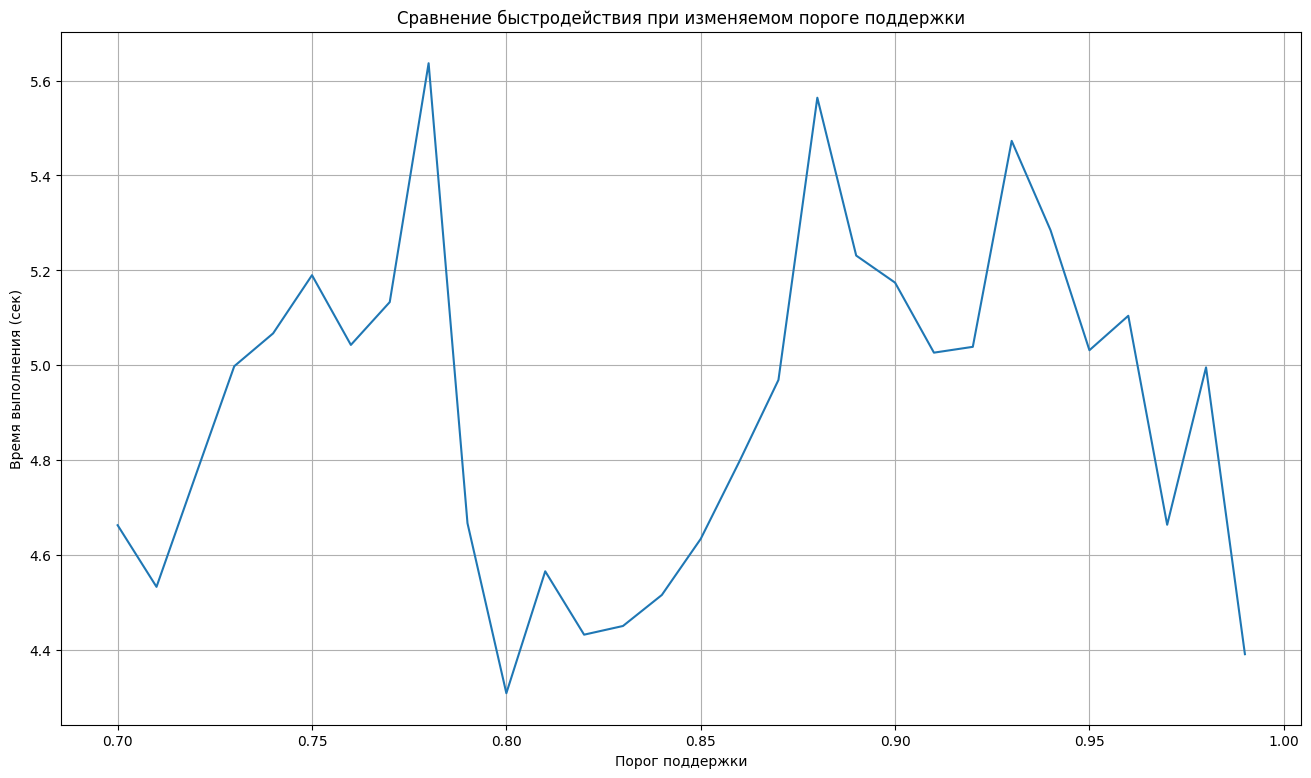

In [16]:
import time
import matplotlib.pyplot as plt


def visualize_rules_count_by_min_conf(items, min_conf):
    times = []
    conf = []
    while min_conf < 1:
        start_time = time.time()
        find_association_rules(items, min_supp=0.002, min_conf=min_conf, sort_by='supp')
        execution_time = time.time() - start_time
        times.append(execution_time)
        conf.append(min_conf)
        
        min_conf += 0.01
        min_conf = round(min_conf, 2)
        
    plt.figure(figsize=(16, 9))
    plt.plot(conf, times)
    plt.title('Сравнение быстродействия при изменяемом пороге достоверности')
    plt.xlabel('Порог достоверности')
    plt.ylabel('Время выполнения (сек)')
    plt.grid(True)
    plt.show()
    
    
visualize_rules_count_by_min_conf(df, 0.7)

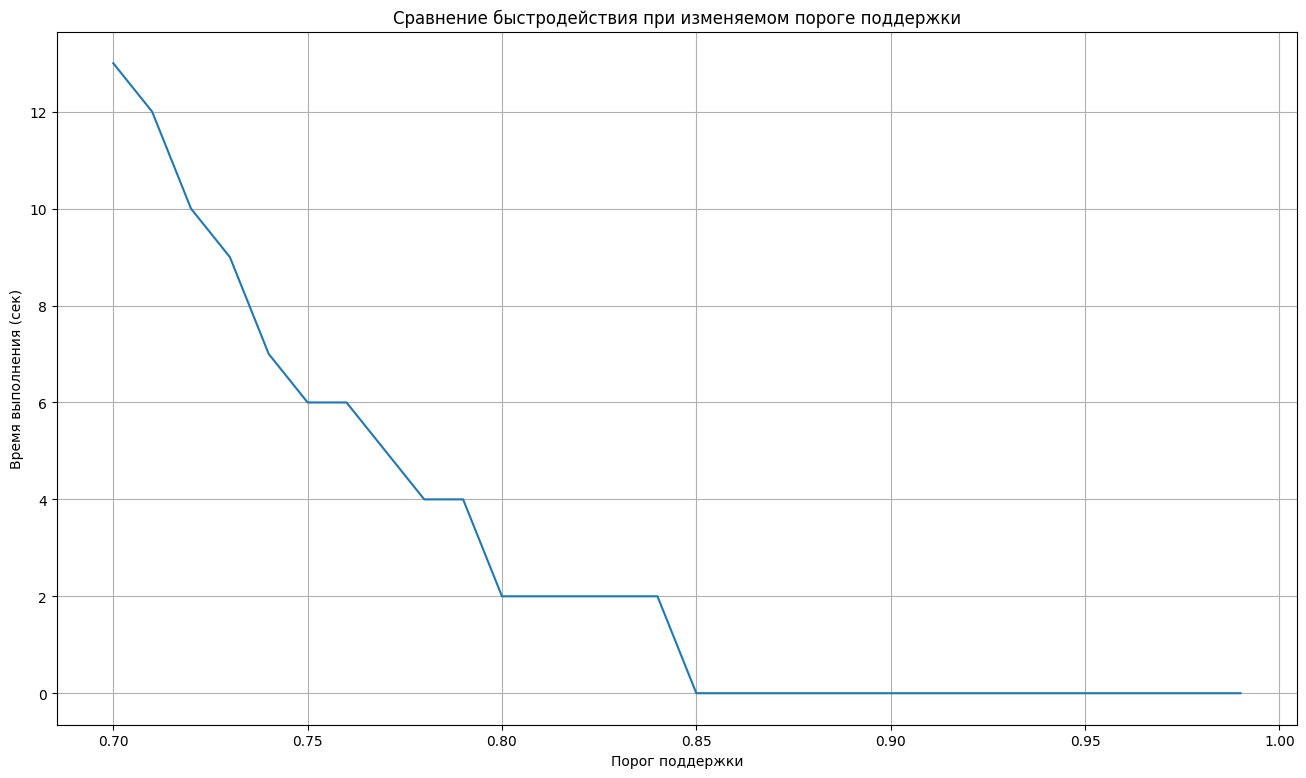

In [19]:
def visualize_rules_count_by_min_conf(items, min_conf):
    counts = []
    conf = []
    while min_conf < 1:
        rules_count = len(find_association_rules(items, min_supp=0.002, min_conf=min_conf, sort_by='supp'))
        counts.append(rules_count)
        conf.append(min_conf)
        
        min_conf += 0.01
        min_conf = round(min_conf, 2)
        
    plt.figure(figsize=(16, 9))
    plt.plot(conf, counts)
    plt.title('Сравнение числа правил при изменяемом пороге достоверности')
    plt.xlabel('Порог достоверности')
    plt.ylabel('Число правил')
    plt.grid(True)
    plt.show()
    
    
visualize_rules_count_by_min_conf(df, 0.7)